In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import os
from six.moves import urllib
for fn_dst in ['exp1.csv', 'exp2.csv']:
  fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/%s' % fn_dst
  if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
  else:
    print('Downloaded %s' % fn_dst) 
    urllib.request.urlretrieve(fn_src, fn_dst)

File exp1.csv is already downloaded
File exp2.csv is already downloaded


In [3]:
names =[ 
        't', 
        'q1','q2','q3',
        'dq1', 'dq2', 'dq3',
        'I1', 'I2', 'I3',
        'eps21', 'eps22', 'eps31', 'eps32',
        'ddq1', 'ddq2', 'ddq3'
]
# TODO 1
df = pd.read_csv('exp1.csv',header=None,sep=',',names=names,na_values='?')

In [4]:
# TODO 2
df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


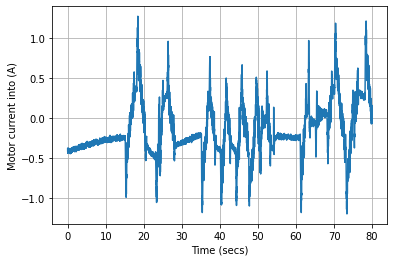

In [5]:
# TODO 3
y = np.array(df['I2'])
t = np.array(df['t'])
plt.plot(t,y,'-')
plt.xlabel('Time (secs)')
plt.ylabel('Motor current into (A)')
plt.grid()

In [6]:
# TODO 4
ytrain = np.array(df['I2'])
colums = ['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']
Xtrain = np.array(df[colums])

In [7]:
from sklearn import linear_model
# Create linear regression object
# TODO 5
regr = linear_model.LinearRegression()
# TODO 6
regr.fit(Xtrain,ytrain)

LinearRegression()

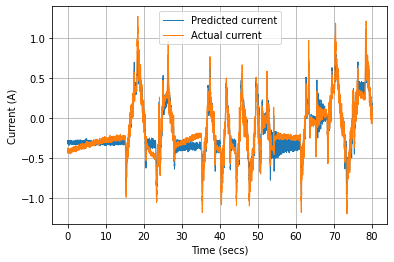

In [8]:
# TODO 7
ytrain_pred = regr.predict(Xtrain)
plt.plot(t,ytrain_pred,'-',linewidth='1')
plt.plot(t,ytrain,'-',linewidth='1')
plt.xlabel('Time (secs)')
plt.ylabel('Current (A)')
plt.grid()
plt.legend(['Predicted current','Actual current'])

In [9]:
# TODO 8
ymean = np.mean(ytrain)
RSS_train = np.mean((ytrain - ytrain_pred)**2) / np.mean((ytrain - ymean)**2)
print("Normalized RSS in training = {}".format(RSS_train))

Normalized RSS in training = 0.09583263861233196


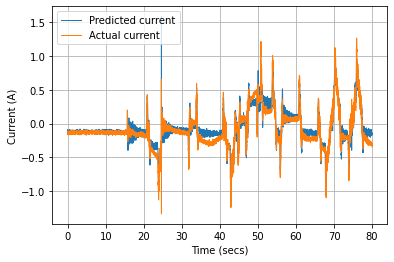

In [10]:
# TODO 9
df_test = pd.read_csv('exp2.csv',header=None,sep=',',names=names,na_values='?')

t_test = np.array(df_test['t'])
ytrain_test = np.array(df_test['I2'])
Xtrain_test = np.array(df_test[colums])

ytrain_pred_t = regr.predict(Xtrain_test)
plt.plot(t,ytrain_pred_t,'-',linewidth='1')
plt.plot(t,ytrain_test,'-',linewidth='1')
plt.xlabel('Time (secs)')
plt.ylabel('Current (A)')
plt.grid()
plt.legend(['Predicted current','Actual current'])

In [11]:
# TODO 10
ymean_test = np.mean(ytrain_test)
RSS_test = np.mean((ytrain_test - ytrain_pred_t)**2) / np.mean((ytrain_test - ymean_test)**2)
print("Normalized RSS in testing = {}".format(RSS_test))

Normalized RSS in testing = 0.12678048804762437
